![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning

### Portfolio uchun vazifa: Toshkent shahrida uylarning narxini aniqlash.

Ushbu amaliyotda sizning vazifangiz berilgan ma`lumotlar asosida Toshkent shahridagi uylarning narxini aniqlash.

In [83]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy joylashgan qavat
- `max_levels` - ja'mi qavatlar soni
- `price` - uy narxi

## Vazifani CRSIP-DM Metolodgiyasi yordamida bajaring.
<img src="https://i.imgur.com/dzZnnYi.png" alt="CRISP-DM" width="800"/>

In [84]:
import numpy as np

df.price = df.price.replace('Договорная', np.nan).astype(float)

In [85]:
df['size'] = df['size'].replace('Площадьземли:1сот', 100).astype(float)

In [86]:
df.loc[df.price > 1000000, 'price'] = np.nan

In [87]:
# Group by 'district' and calculate the mean of 'price' for each group
price_mean = df.groupby('district')['price'].transform(lambda x: x.fillna(x.mean()))

df['price'] = df['price'].fillna(price_mean)

In [88]:
df['m2_per_room'] = df['size'] / df.rooms
df['price_per_m2'] = df.price / df['size']
df['room_price'] = df.price / df.rooms

In [89]:
trash = df.loc[df['m2_per_room'] > 100].index
df.drop(index=trash, inplace=True)

trash = df.loc[df['size'] < 5].index
df.drop(index=trash, inplace=True)

trash = df.loc[df.price_per_m2 > 5000].index
df.drop(index=trash, inplace=True)

trash = df[(df.price_per_m2 < 100) | ((df.m2_per_room < 20) & (df.price_per_m2 > 2500))].index
df.drop(index=trash, inplace=True)

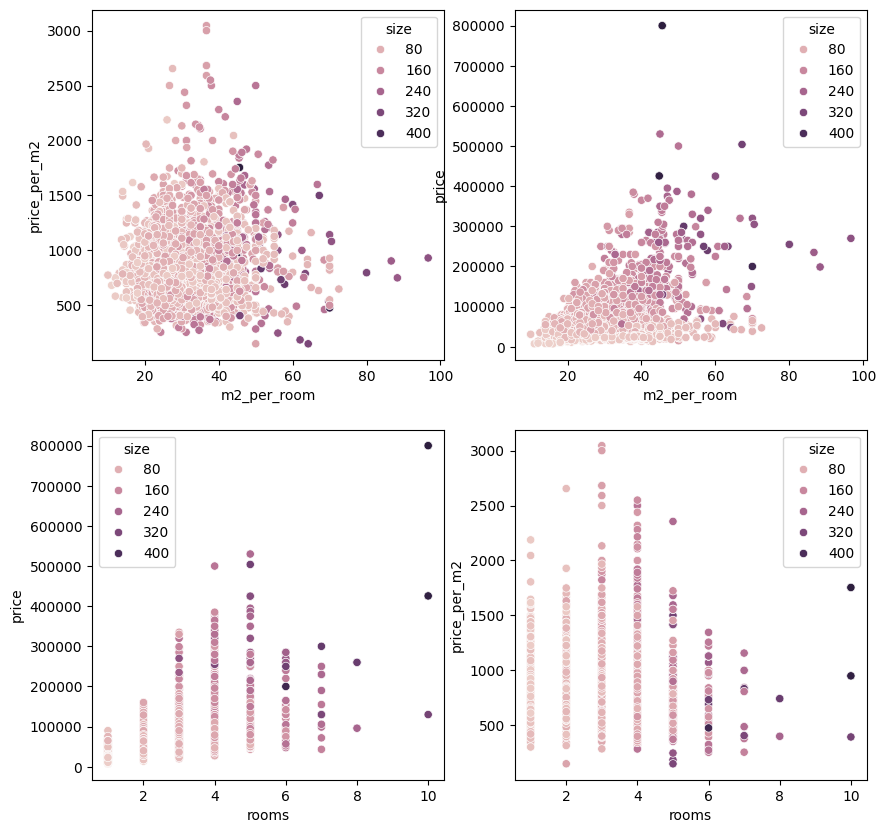

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

data = df

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

sns.scatterplot(data=data, x='m2_per_room', y='price_per_m2', ax=ax[0, 0], hue='size')
sns.scatterplot(data=data, x='m2_per_room', y='price', ax=ax[0, 1], hue='size')
sns.scatterplot(data=data, x='rooms', y='price', ax=ax[1, 0], hue='size')
sns.scatterplot(data=data, x='rooms', y='price_per_m2', ax=ax[1, 1], hue='size')

plt.show()

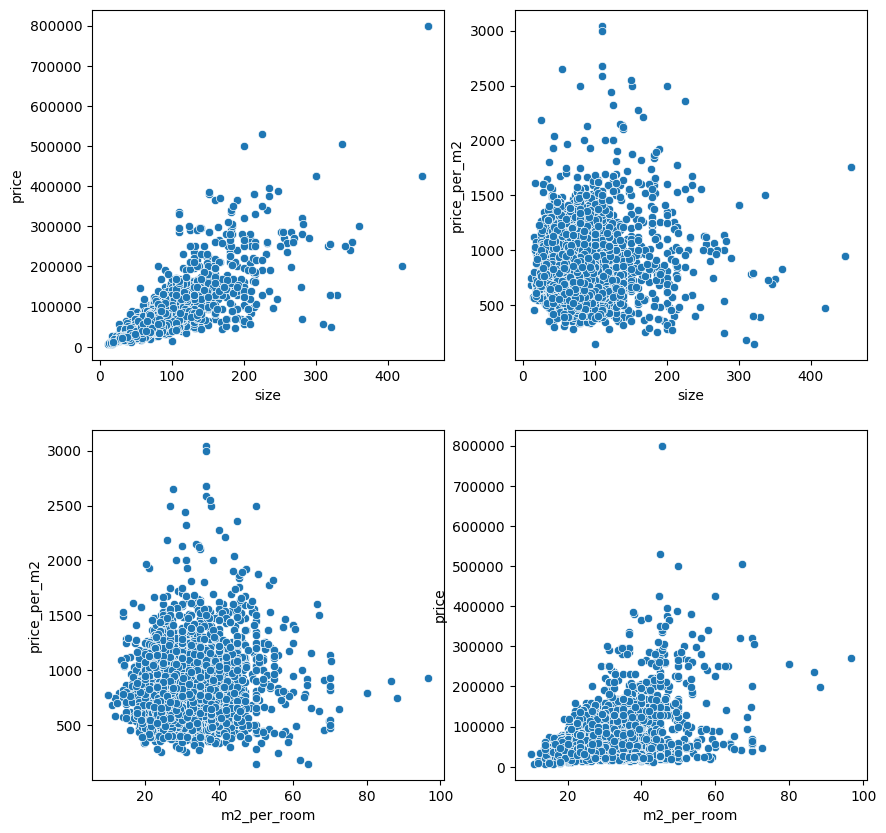

In [91]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

sns.scatterplot(data=df, x='size', y='price', ax=ax[0, 0])
sns.scatterplot(data=df, x='size', y='price_per_m2', ax=ax[0, 1])
sns.scatterplot(data=df, x='m2_per_room', y='price_per_m2', ax=ax[1, 0])
sns.scatterplot(data=df, x='m2_per_room', y='price', ax=ax[1, 1])

plt.show()

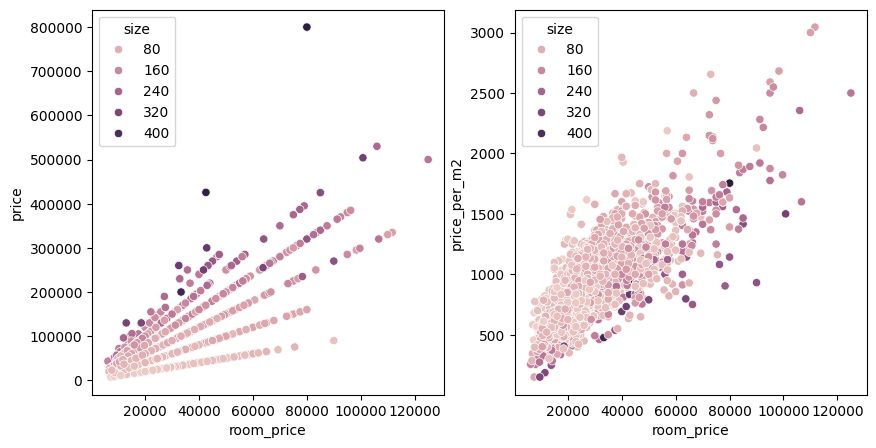

In [92]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.scatterplot(data=df, x='room_price', y='price', ax=ax[0], hue='size')
sns.scatterplot(data=df, x='room_price', y='price_per_m2', ax=ax[1], hue='size')

plt.show()

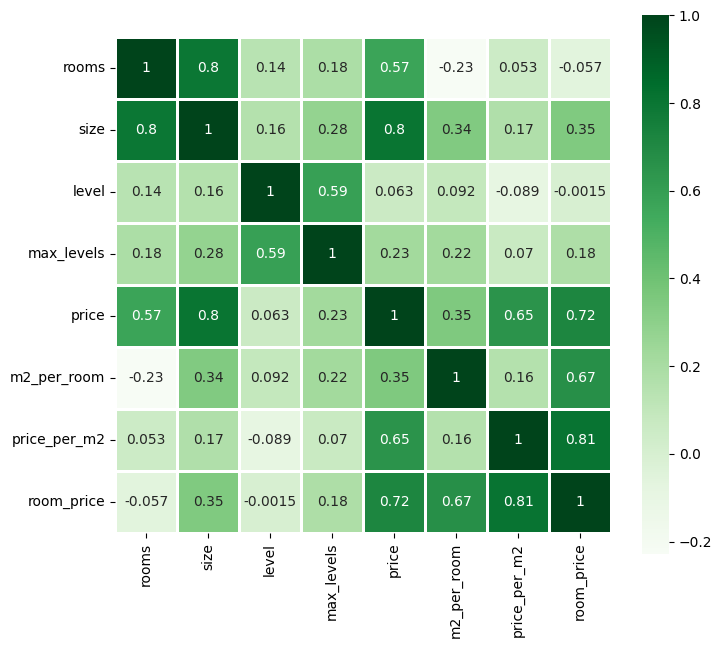

In [93]:
corr = df.corr()

plt.figure(figsize=(8, 7))

sns.heatmap(data=corr, square=True, cmap='Greens', linewidths=1, annot=True)

plt.show()

In [94]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['location_label'] = encoder.fit_transform(df.location)

df.drop('location', axis=1, inplace=True)

In [95]:
districts = pd.get_dummies(df.district)

df = df.merge(districts, left_index=True, right_index=True)

df.drop('district', axis=True, inplace=True)

df.head()

,rooms,size,level,max_levels,price,m2_per_room,price_per_m2,room_price,location_label,Бектемирский,...,Мирзо-Улугбекский,Олмазорский,Сергелийский,Учтепинский,Чиланзарский,Шайхантахурский,Юнусабадский,Яккасарайский,Янгихаётский,Яшнободский
0,3,57.0,4,4,52000.0,19.000000,912.280702,17333.333333,1208,0,...,0,0,0,0,0,0,1,0,0,0
1,2,52.0,4,5,56000.0,26.000000,1076.923077,28000.000000,1264,0,...,0,0,0,0,0,0,0,1,0,0
2,2,42.0,4,4,37000.0,21.000000,880.952381,18500.000000,869,0,...,0,0,0,0,1,0,0,0,0,0
3,3,65.0,1,4,49500.0,21.666667,761.538462,16500.000000,887,0,...,0,0,0,0,1,0,0,0,0,0
4,3,70.0,3,5,55000.0,23.333333,785.714286,18333.333333,944,0,...,0,0,0,0,1,0,0,0,0,0


In [96]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

## LinearRegression

In [97]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

In [98]:
X = train_set.drop('price', axis=1)
Y = train_set['price'].copy()

In [99]:
lr_model.fit(X, Y)

LinearRegression()

In [100]:
X_test = test_set.drop('price', axis=1)
Y_test = test_set['price'].copy()

In [101]:
labels = lr_model.predict(X_test)

labels

array([44842.59744711, 54309.14855533, 27165.82273996, ...,
       19135.49568517, 24832.00642043, 44281.24200531])

RMSE

In [104]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(Y_test, labels)

np.sqrt(rmse)

11124.79680519145

MAE

In [105]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(Y_test, labels)

mae

5473.645902919644

In [108]:
diff = pd.DataFrame({'true': Y_test, 'predict': labels})

diff['diff'] = diff['true'] - diff['predict']

diff.head(10)

,true,predict,diff
5903,44685.923341,44842.597447,-156.674106
1058,50000.000000,54309.148555,-4309.148555
2699,32000.000000,27165.822740,4834.177260
2667,34000.000000,31375.334294,2624.665706
3845,160000.000000,163367.133056,-3367.133056
5960,27500.000000,36032.954624,-8532.954624
4093,52000.000000,57526.172797,-5526.172797
2684,120000.000000,119276.770974,723.229026
6098,32000.000000,27154.944275,4845.055725
4753,55000.000000,54882.810137,117.189863


In [114]:
sum = np.abs(diff['diff'])

sum.sum() / sum.count()

5473.645902919644